In [ ]:
!git clone https://github.com/IEEE-CISCodeCraft/Machine-Learning-Simplified.git

#Replace the <code>None</code> instances pesent in the code.

In [ ]:
!cp "/content/Machine-Learning-Simplified/Day-1/LRTestCases.py" "/content/"

In [ ]:
from LRTestCases import *

In [ ]:
def error(yhat, y):
    error = yhat - y      #Subtract y from yhat
    return error

In [ ]:
#TEST YOUR IMPLEMENTATION
test_error_function(error)

Test passed!


In [ ]:
def error_square(error):
    square = error **2        #Square the error claculated above
    return square

In [ ]:
#TEST YOUR IMPLEMENTATION
test_error_square_function(error_square)

Test passed!


In [ ]:
def total_squared_error(error, num):
    total_squared_error = 0
    for i in range(num):
      total_squared_error = total_squared_error + error     #Add the "error" to the "total_sqared_error"
    return total_squared_error

In [ ]:
#TEST YOUR IMPLEMENTATION
test_total_squared_error_function(total_squared_error)

Test passed!


$\text{Mean Squared Error}=\frac{1}{2*m}\sum\limits_{i = 0}^{m-1}(y-ŷ)^2$

In [ ]:
def mse(total_squared_error, num):
    denominator = 2*num           #Multipy num with 2
    mse = total_squared_error/denominator   #Divide "total_sqaured_error" by "denominator"
    return num

In [ ]:
#TEST YOUR IMPLEMENTATION
test_mse_function(mse)

Test passed!


**Finding the predicted value**

In [ ]:
def predicted_value(w, x, b):
    yhat = None     #Multiply 'w' with 'x' and add 'b'
    return yhat

In [ ]:
#TEST YOUR IMPLEMENTATION
test_predicted_value(predicted_value)

## Cost Function
The equation for cost with one variable is:
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (ŷ - y^{(i)})^2$$

In [ ]:
def compute_cost(x, y, w, b):
    # number of training examples
    m = x.shape[0]
    total_squared_error = 0
    for i in range(m):
        yhat = w * x[i] + b
        error = None         #Subtract "y[i]" from "yhat"
        squared_error = None   #Square the error
        total_squared_error = None  #Add the "error" to the "total_sqared_error"
    denominator = None     #Multiply m by 2
    total_cost = None      #Divide total_cost by denominator
    return total_cost

# Gradient Descent
## 1. Compute Gradient
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (ŷ - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (ŷ - y^{(i)}) \\
\end{align}
$$

In [ ]:
def compute_gradient(x, y, w, b):
    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        yhat = w * x[i] + b
        dj_dw_i = (yhat - y[i]) * x[i]
        dj_db_i = yhat - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [ ]:
test_compute_gradient(compute_gradient)

## 2. Update the parameters <code>num_iterations</code> times
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.

In [ ]:
def gradient_descent(x, y, learning_rate, num_iterations):
    # Initialize weights and bias
    w = 0
    b = 0
    # Number of training examples
    m = x.shape[0]
    for _ in range(num_iterations):
        # Compute gradients using the compute_gradient function
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # Update weights and bias
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db
        # Compute the cost for monitoring
        cost = compute_cost(x, y, w, b)
        print(f'Iteration {_+1}/{num_iterations}, Cost: {cost:.6f}')
    return w, b

In [ ]:
test_gradient_descent(gradient_descent, compute_cost, compute_gradient)

# **Project:** Melanoma Tumor Size Prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
#Read the dataset
data=pd.read_csv('/content/Machine-Learning-Simplified/Day-1/melanoma_dataset.csv')

In [61]:
#Display the dataset
data

,mass_npea,tumor_size
0,18.159306,7.490802
1,39.693228,19.014286
2,32.659956,14.639879
3,27.556925,11.973170
4,9.800536,3.120373
...,...,...
995,5.343260,1.831641
996,39.080774,18.346272
997,8.435708,2.736373
998,40.580192,19.004747


In [62]:
#Gain insights of dataset
data.describe()

,mass_npea,tumor_size
count,1000.000000,1000.000000
mean,22.709158,9.805131
std,11.682122,5.842747
min,1.575483,0.092640
25%,12.290811,4.719465
50%,22.968280,9.936148
75%,32.664439,14.886392
max,44.255681,19.994353


<Axes: xlabel='mass_npea', ylabel='tumor_size'>

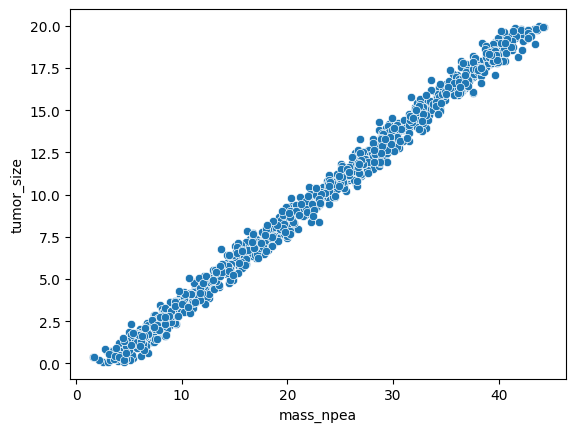

In [63]:
#Plot a graph to check linearity
sns.scatterplot(x='mass_npea',y='tumor_size',data=data)

In [64]:
#Extract X and Y from data
X=data[['mass_npea']]
Y=data['tumor_size']

In [65]:
#Train a Linear Regression Model
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [68]:
#Evaluate the Model
Y_pred=model.predict(X)
mse=mean_squared_error(Y,y_pred)
mse

0.24388273258319765

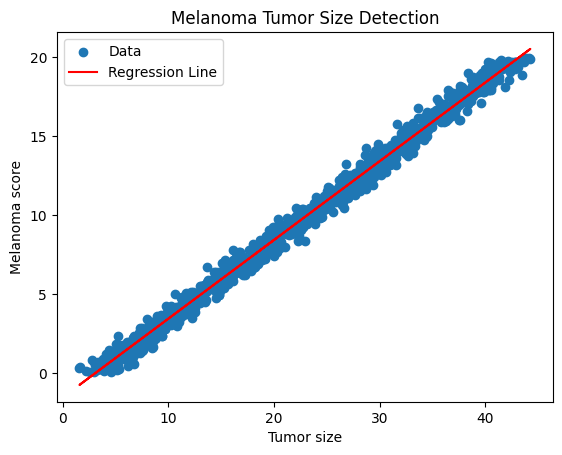

In [69]:
# Plot the data and regression line
plt.scatter(X,Y,label='Data')
plt.plot(X,Y_pred,color='red',label='Regression Line')
plt.xlabel('Tumor size')
plt.ylabel('Melanoma score')
plt.title('Melanoma Tumor Size Detection')
plt.legend()
plt.show()